In [9]:
import cv2
import os
from pathlib import Path
from matplotlib import pyplot as plt
import math
import numpy as np

In [2]:
#
path = Path("Dataset_TP3")
videos_paths = [p for p in path.iterdir() if p.is_file()]

videos = {}
for file in videos_paths:
    vid = cv2.VideoCapture(file)
    if not vid.isOpened():
        print("Error: Could not open video.")
        continue
    videos[file] = vid

In [3]:
# Histogramme
frame_number = 0
histograms = {}
for vid in videos:
    histograms_frame = []
    video_file = videos[vid]
    print(f"Computing histograms for {vid}")
    while True:
        ret, frame = video_file.read()
        if not ret:
            break

        frame_number += 1
        b, g, r = cv2.split(frame)

        hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])
        hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
        hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])

        hist = []
        hist.append(hist_r)
        hist.append(hist_g)
        hist.append(hist_b)
        histograms_frame.append(hist)
    histograms[vid] = histograms_frame
    print(f"Computed {len(histograms_frame)} frames")

Computing histograms for Dataset_TP3/combat_cuts.mp4
Computed 5047 frames
Computing histograms for Dataset_TP3/drone_mouvement_canyon.mp4
Computed 2015 frames
Computing histograms for Dataset_TP3/fondu_enchaine_gony.mp4
Computed 1389 frames
Computing histograms for Dataset_TP3/tennis_plan_fixe.mp4
Computed 18278 frames


In [10]:
def compute_euclidean_distance(hist_a, hist_b, n: int) -> float:
    # distance = 0.0
    # for i in range(n):
    #     distance += (hist_a[i] - hist_a[i+2]) ** 2
    # return math.sqrt(distance)
    return np.linalg.norm(hist_a - hist_b)

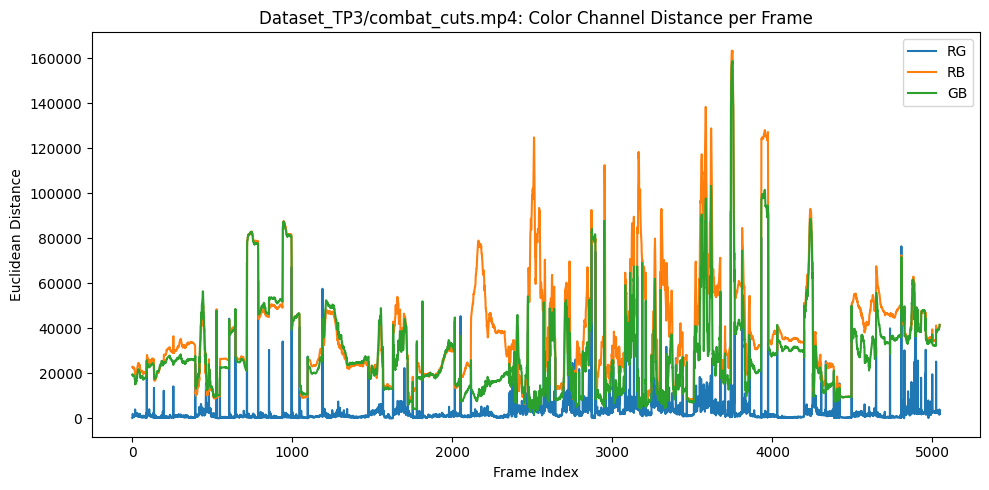

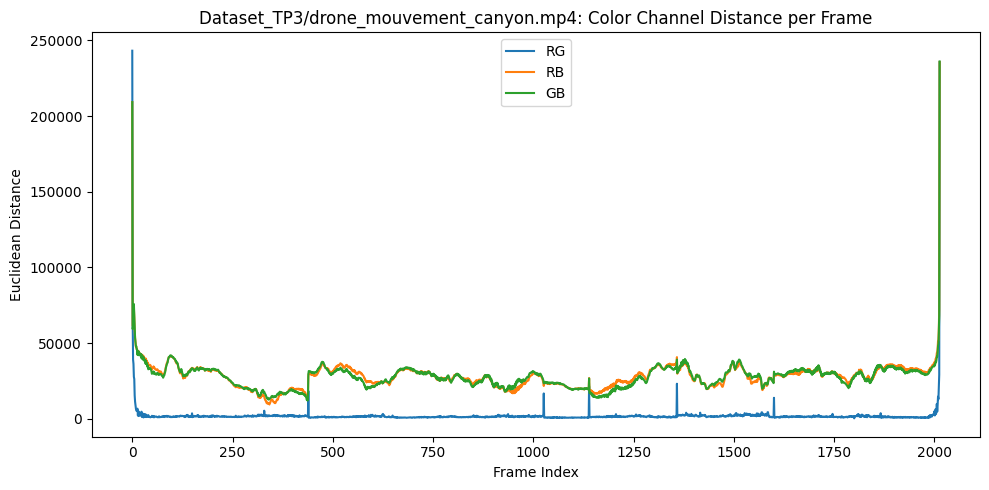

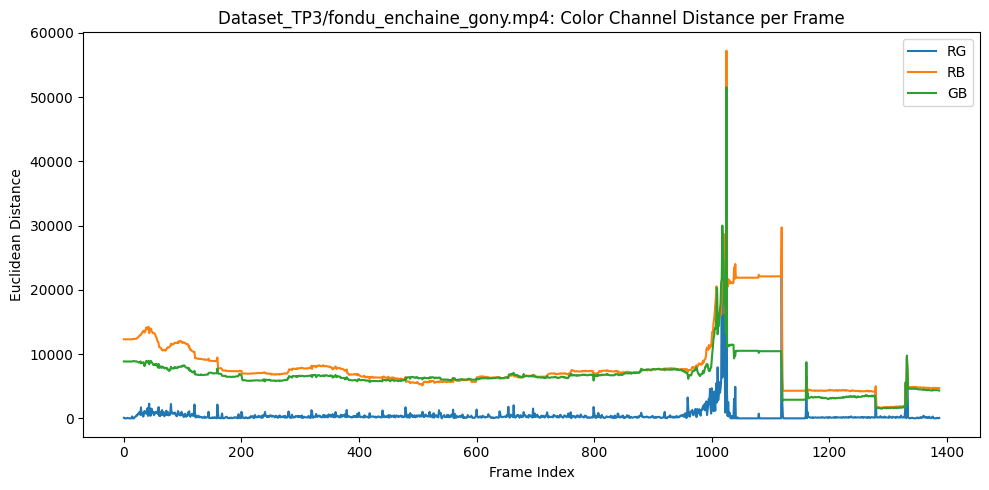

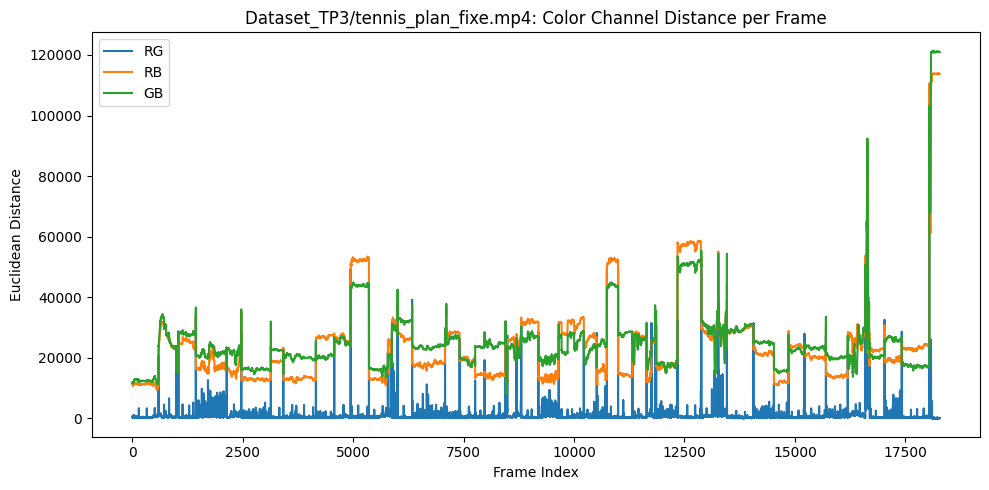

In [11]:
N = 1
for histo in histograms:
    frames = histograms[histo]
    distance_rg = []
    distance_rb = []
    distance_gb = []
    for i in range(1, len(frames)):
        prev_r, prev_g, prev_b = frames[i-1]
        curr_r, curr_g, curr_b = frames[i]
        distance_rg.append(compute_euclidean_distance(prev_r, curr_r, N))
        distance_rb.append(compute_euclidean_distance(prev_r, curr_b, N))
        distance_gb.append(compute_euclidean_distance(prev_g, curr_b, N))

    plt.figure(figsize=(10, 5))
    plt.plot(distance_rg, label="RG")
    plt.plot(distance_rb, label="RB")
    plt.plot(distance_gb, label="GB")

    plt.xlabel("Frame Index")
    plt.ylabel("Euclidean Distance")
    plt.title(f"{histo}: Color Channel Distance per Frame")
    plt.legend()
    plt.tight_layout()
    plt.show()
    